In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix

from sklearn.metrics import  roc_auc_score
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
%matplotlib inline

# Deliverable – 1 (Exploratory data quality report reflecting the following) – (20)
##1. Univariate analysis (12 marks)
###a. Univariate analysis – data types and description of the independent attributes which should include (name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers.
###b. Strategies to address the different data challenges such as data pollution, outlier’s treatment and missing values treatment.
###c. Please provide comments in jupyter notebook regarding the steps you take and insights drawn from the plots.

In [2]:
df = pd.read_csv('bank-full.csv')

In [3]:
df.head(10)

age           job   marital  education default  balance housing loan  \
0   58    management   married   tertiary      no     2143     yes   no   
1   44    technician    single  secondary      no       29     yes   no   
2   33  entrepreneur   married  secondary      no        2     yes  yes   
3   47   blue-collar   married    unknown      no     1506     yes   no   
4   33       unknown    single    unknown      no        1      no   no   
5   35    management   married   tertiary      no      231     yes   no   
6   28    management    single   tertiary      no      447     yes  yes   
7   42  entrepreneur  divorced   tertiary     yes        2     yes   no   
8   58       retired   married    primary      no      121     yes   no   
9   43    technician    single  secondary      no      593     yes   no   

   contact  day month  duration  campaign  pdays  previous poutcome Target  
0  unknown    5   may       261         1     -1         0  unknown     no  
1  unknown    5   may       151         1     -1         0  unknown     no  
2  unknown    5   may        76         1     -1         0  unknown     no  
3  unknown    5   may        92         1     -1         0  unknown     no  
4  unknown    5   may       198         1     -1         0  unknown     no  
5  unknown    5   may       139         1     -1         0  unknown     no  
6  unknown    5   may       217         1     -1         0  unknown     no  
7  unknown    5   may       380         1     -1         0  unknown     no  
8  unknown    5   may        50         1     -1         0  unknown     no  
9  unknown    5   may        55         1     -1         0  unknown     no

In [4]:
df.shape

(45211, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
df.isna().sum() #check for % null values

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

## Univariate Analysis

In [7]:
#getting the different variables
columns_cat =  set()
columns_numeric = set()
for key in df.columns:
    if df[key].dtype == 'object':
        columns_cat.add(key)
    else:
        columns_numeric.add(key)

columns_cat  = list(columns_cat)
columns_numeric = list(columns_numeric)
        
print( f'Numeric fields {columns_numeric}')
print( f'Categorical fields {columns_cat}')


Numeric fields ['duration', 'age', 'day', 'pdays', 'previous', 'campaign', 'balance']
Categorical fields ['housing', 'month', 'education', 'poutcome', 'loan', 'contact', 'Target', 'job', 'marital', 'default']


## Univariate Analysis Continous features

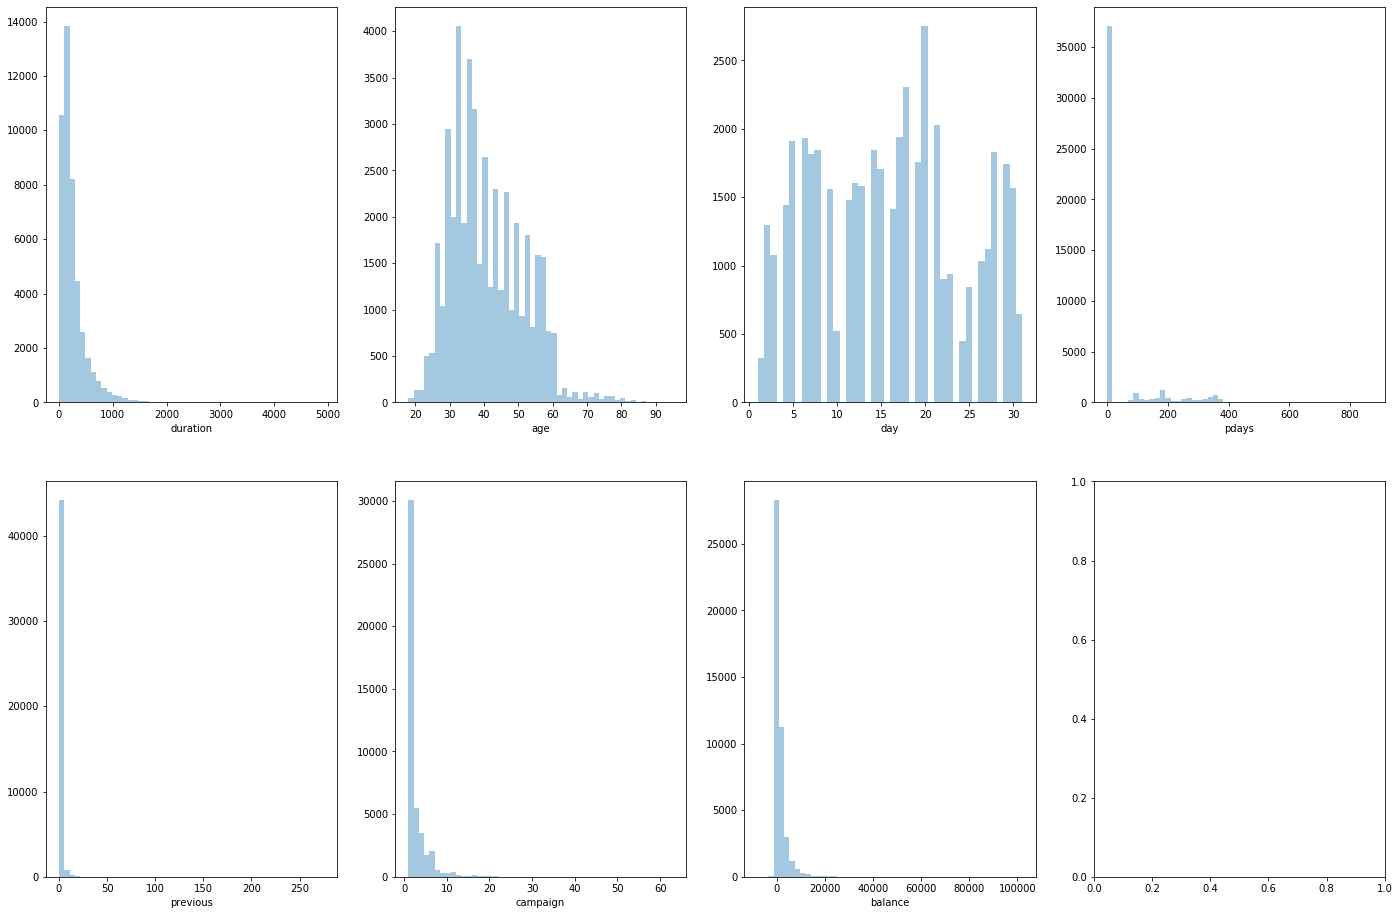

In [8]:
#numeric fields 
m = len(columns_numeric)
fig, axs = plt.subplots(2,4,figsize=(24,16))

i=0
for key in columns_numeric:
    sns.distplot( df[key] ,  ax = axs[i//4][i%4] , kde=False)
    i =i +1
plt.show()

##Observation 
## pdays =-1 or pdays =0 needs to be analysed

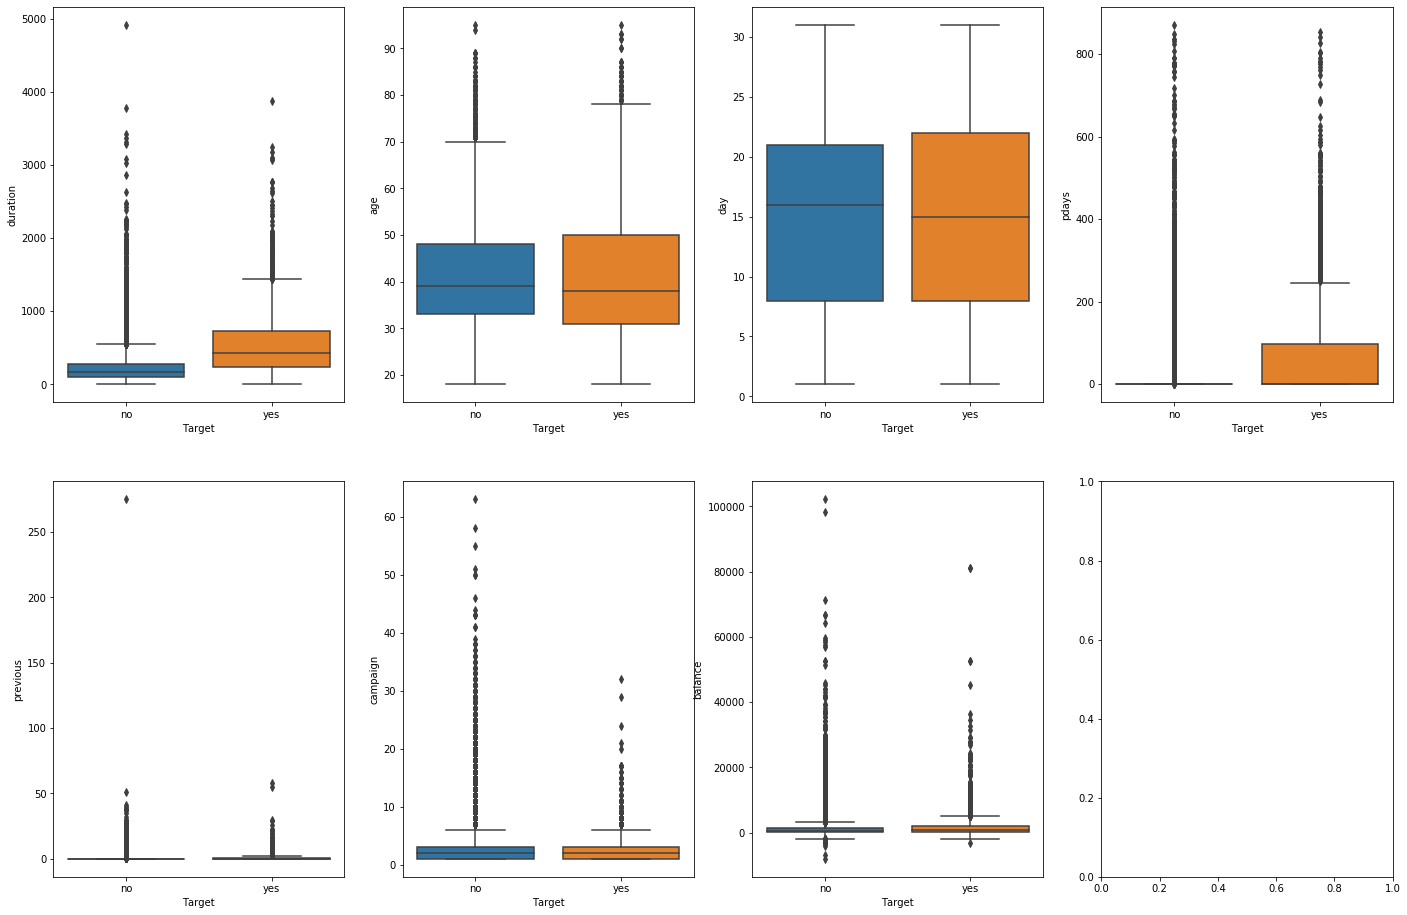

Target         no                                                         \
            count         mean          std     min   25%    50%     75%   
duration  39922.0   221.182806   207.383237     0.0  95.0  164.0   279.0   
age       39922.0    40.838986    10.172662    18.0  33.0   39.0    48.0   
day       39922.0    15.892290     8.294728     1.0   8.0   16.0    21.0   
pdays     39922.0    36.421372    96.757135    -1.0  -1.0   -1.0    -1.0   
previous  39922.0     0.502154     2.256771     0.0   0.0    0.0     0.0   
campaign  39922.0     2.846350     3.212767     1.0   1.0    2.0     3.0   
balance   39922.0  1303.714969  2974.195473 -8019.0  58.0  417.0  1345.0   

Target                 yes                                                  \
               max   count         mean          std     min    25%    50%   
duration    4918.0  5289.0   537.294574   392.525262     8.0  244.0  426.0   
age           95.0  5289.0    41.670070    13.497781    18.0   31.0   38.0   
day           31.0  5289.0    15.158253     8.501875     1.0    8.0   15.0   
pdays        871.0  5289.0    68.702968   118.822266    -1.0   -1.0   -1.0   
previous     275.0  5289.0     1.170354     2.553272     0.0    0.0    0.0   
campaign      63.0  5289.0     2.141047     1.921826     1.0    1.0    2.0   
balance   102127.0  5289.0  1804.267915  3501.104777 -3058.0  210.0  733.0   

Target                     
             75%      max  
duration   725.0   3881.0  
age         50.0     95.0  
day         22.0     31.0  
pdays       98.0    854.0  
previous     1.0     58.0  
campaign     3.0     32.0  
balance   2159.0  81204.0

In [9]:
#numeric field
m = len(columns_numeric)
fig, axs = plt.subplots(2,4,figsize=(24,16))

i=0
for key in columns_numeric:
    sns.boxplot(y = key , x = 'Target', data = df, ax = axs[i//4][i%4])
    i =i +1

plt.show()

pd.DataFrame(df.groupby('Target')[columns_numeric].describe().T.unstack())

#Answer and Observation
#For Previous a notable outlier
#For Duration a notable outlier
#For balance a notable outlier

## Handling outliers

In [10]:
#handling the outliers as found in the steps above
print(df[ (df.duration>4000) | (df.previous>250) |  (df.balance>80000)])
# We can delete the Target = no in above query
#  we have many Target = no records and these 4 are definitely outliers
# we can keep the yes records  because of less number of yes records
df.drop([24148,26227,29182,39989], inplace=True)

       age         job  marital  education default  balance housing loan  \
24148   59  technician  married   tertiary      no     6573     yes   no   
26227   59  management  married   tertiary      no    98417      no   no   
29182   40  management  married   tertiary      no      543     yes   no   
39989   51  management   single   tertiary      no   102127      no   no   
42558   84     retired  married  secondary      no    81204      no   no   
43393   84     retired  married  secondary      no    81204      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome  \
24148  telephone   10   nov      4918         1     -1         0  unknown   
26227  telephone   20   nov       145         5     -1         0  unknown   
29182   cellular    2   feb       349         2    262       275    other   
39989   cellular    3   jun        90         1     -1         0  unknown   
42558  telephone   28   dec       679         1    313         2    other   
43393

In [11]:
##pdays analysis

print('\npdays =-1')
dfg =  df[(df.pdays==-1)].groupby(by =['Target','poutcome'])
print(dfg['contact'].count())

print('\npdays =0')
dfg =  df[(df.pdays==0)].groupby(by =['Target','poutcome'])
print(dfg['contact'].count())

print('\npdays >0')
dfg =  df[(df.pdays>0)].groupby(by =['Target','poutcome'])
print(dfg['contact'].count().T)



##majority of Target = Yes had pdays = -1
#for Target = yes the pdays < 365 for those with pdays != -1


pdays =-1
Target  poutcome
no      unknown     33567
yes     unknown      3384
Name: contact, dtype: int64

pdays =0
Series([], Name: contact, dtype: int64)

pdays >0
Target  poutcome
no      failure     4283
        other       1532
        success      533
        unknown        3
yes     failure      618
        other        307
        success      978
        unknown        2
Name: contact, dtype: int64


## Univariate Analysis Categorical/Ordinal features

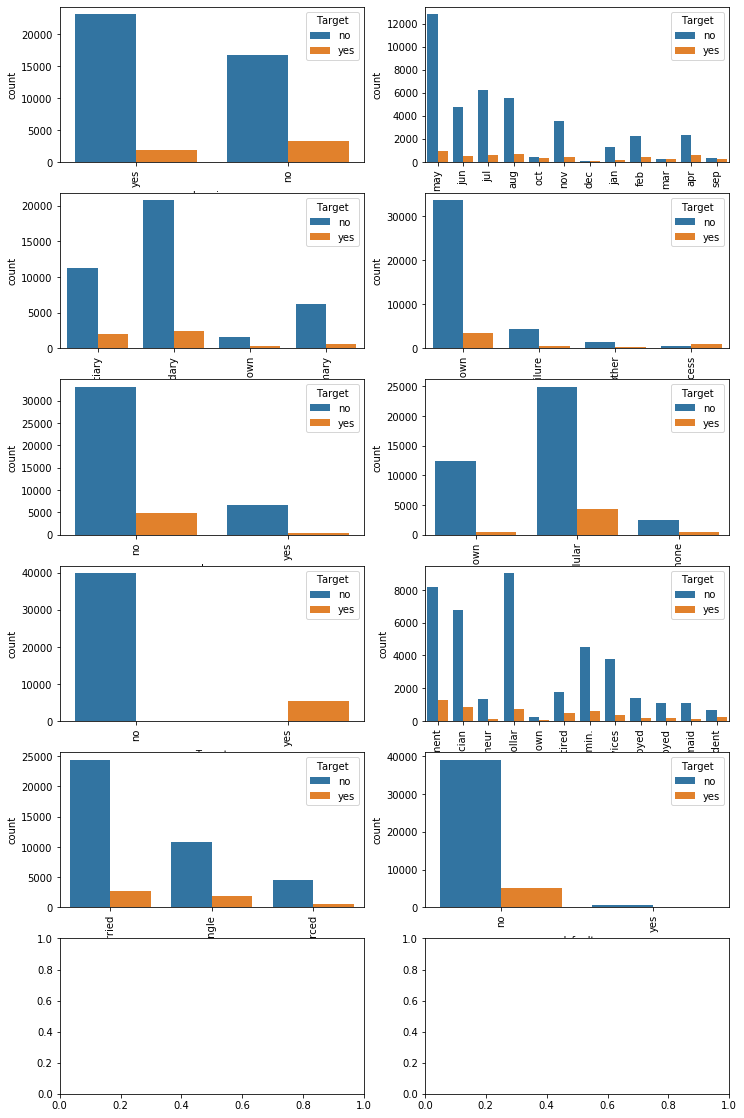

In [12]:
#categorical values

m = len(columns_cat)
fig, axs = plt.subplots(6,2,figsize=(12,20))

i=0
for key in columns_cat:
    ax1 = axs[i//2][i%2]
    sns.countplot(x = key , hue = 'Target', data = df, ax = ax1)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 90)
    i =i +1
plt.show()

#Answer observation
# poutcome/unknown very high 
# housing loan = no Target = yes more
# very few people with loan had Target  - yes
# married - yes / most Target = yes
# default seems to be a very important criteria
# cellular seems to be the most common way to contact - but this can only mean that it was eaiser to contact them
# management job seems to be most Target = yes


### Checking unique values for categorical

In [13]:
#Categorical values 
for key in columns_cat:
    dfg = pd.crosstab(df[key], df.Target,margins = True)
    print(dfg)
    print()
    
#Answer and Observation
#Categorical values look ok
# we can drop job = unknown 

Target      no   yes    All
housing                    
no       16725  3354  20079
yes      23193  1935  25128
All      39918  5289  45207

Target     no   yes    All
month                     
apr      2355   577   2932
aug      5559   688   6247
dec       114   100    214
feb      2207   441   2648
jan      1261   142   1403
jul      6268   627   6895
jun      4794   546   5340
mar       229   248    477
may     12841   925  13766
nov      3565   403   3968
oct       415   323    738
sep       310   269    579
All     39918  5289  45207

Target        no   yes    All
education                    
primary     6260   591   6851
secondary  20752  2450  23202
tertiary   11301  1996  13297
unknown     1605   252   1857
All        39918  5289  45207

Target       no   yes    All
poutcome                    
failure    4283   618   4901
other      1532   307   1839
success     533   978   1511
unknown   33570  3386  36956
All       39918  5289  45207

Target     no   yes    All
loan       

In [14]:
# categorrical - checking job 
print(df[(df.job=='unknown')].groupby(by=['Target','education','poutcome'])['marital'].count())
# we keep the job type unknow as 10%+ of unknow job type had target = yes

Target  education  poutcome
no      primary    failure       2
                   unknown      46
        secondary  failure       6
                   unknown      56
        tertiary   failure       4
                   unknown      31
        unknown    failure       2
                   other         1
                   success       2
                   unknown     104
yes     primary    success       1
                   unknown       2
        secondary  failure       3
                   other         1
                   success       3
                   unknown       2
        tertiary   success       2
                   unknown       2
        unknown    failure       3
                   success       3
                   unknown      12
Name: marital, dtype: int64


In [15]:
#change to categorical
for key in columns_cat:
    df[key] = df[key].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45207 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45207 non-null  int64   
 1   job        45207 non-null  category
 2   marital    45207 non-null  category
 3   education  45207 non-null  category
 4   default    45207 non-null  category
 5   balance    45207 non-null  int64   
 6   housing    45207 non-null  category
 7   loan       45207 non-null  category
 8   contact    45207 non-null  category
 9   day        45207 non-null  int64   
 10  month      45207 non-null  category
 11  duration   45207 non-null  int64   
 12  campaign   45207 non-null  int64   
 13  pdays      45207 non-null  int64   
 14  previous   45207 non-null  int64   
 15  poutcome   45207 non-null  category
 16  Target     45207 non-null  category
dtypes: category(10), int64(7)
memory usage: 4.4 MB


## 2. Multivariate analysis (8 marks)

###a. Bi-variate analysis between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Visualize the analysis using boxplots and pair plots, histograms or density curves. Select the most appropriate attributes.
###b. Please provide comments in jupyter notebook regarding the steps you take and insights drawn from the plots

### Please note: a lot of bivariate analysis was done under unilateral section also

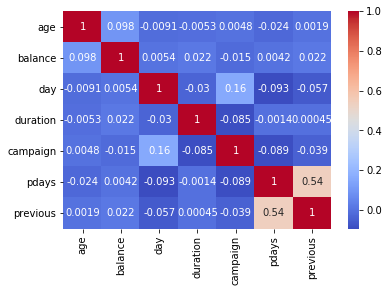

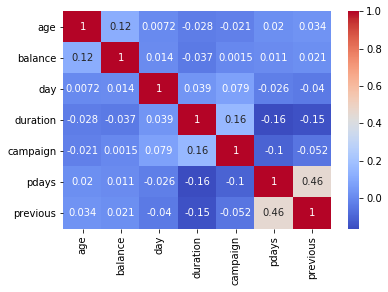

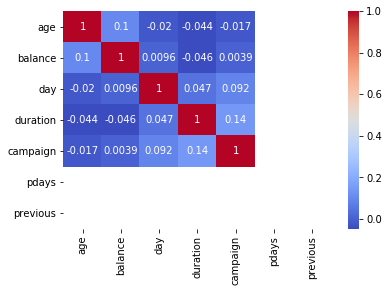

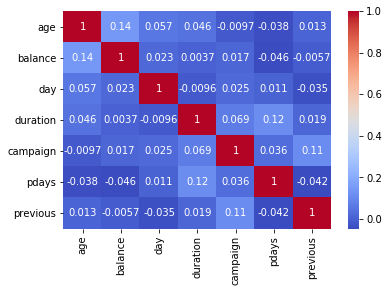

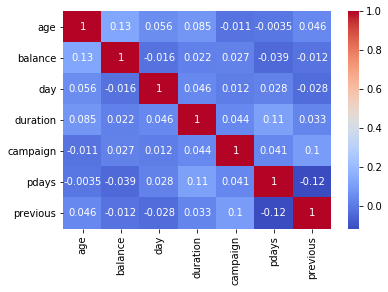

In [16]:
# checking correlation
corr = df.corr()
sns.heatmap(corr, annot = True, fmt='.2g',cmap= 'coolwarm')
plt.show()

corr = df[(df.Target=='yes')].corr()
sns.heatmap(corr, annot = True, fmt='.2g',cmap= 'coolwarm')
plt.show()

corr = df[(df.Target=='yes') & (df.pdays == -1)].corr()
sns.heatmap(corr, annot = True, fmt='.2g',cmap= 'coolwarm')
plt.show()

corr = df[(df.Target=='yes') & (df.pdays >0)].corr()
sns.heatmap(corr, annot = True, fmt='.2g',cmap= 'coolwarm')
plt.show()

##previous successful ?
corr = df[(df.Target=='yes') & (df.poutcome=='success')].corr()
sns.heatmap(corr, annot = True, fmt='.2g',cmap= 'coolwarm')
plt.show()


##No real correlation

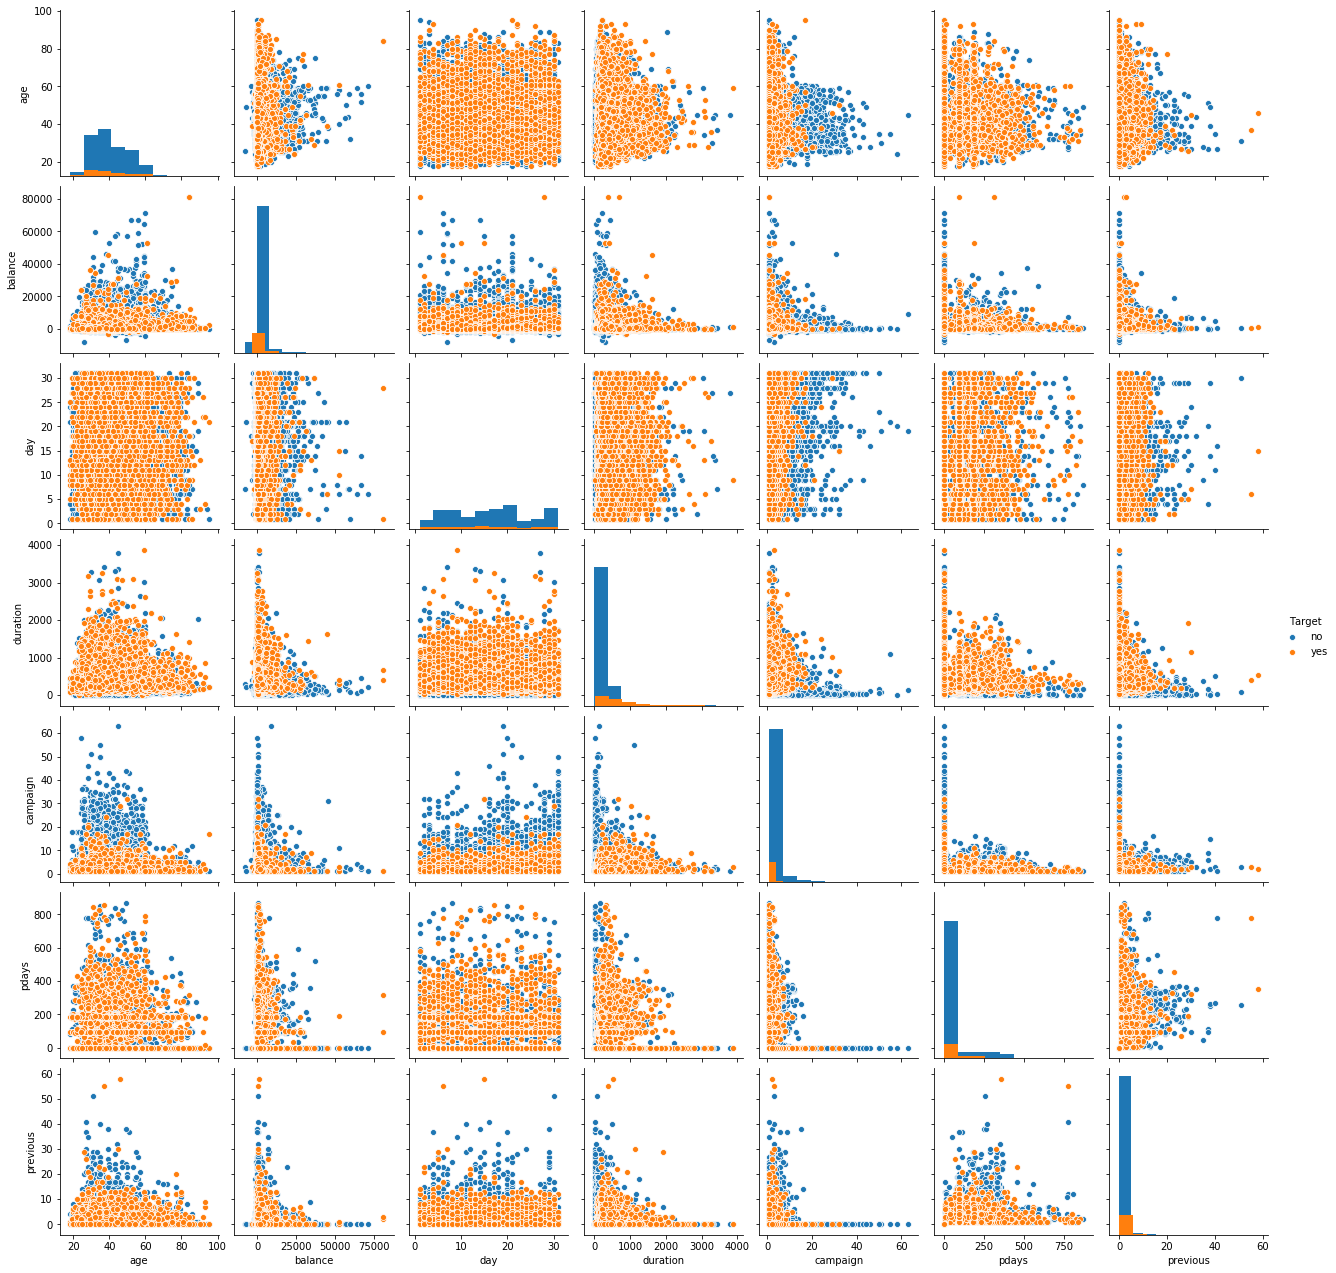

In [17]:
sns.pairplot(df, hue = 'Target' , diag_kind="hist")

In [18]:
## Analysing previous and this campaign
dfg =df.groupby(by=['Target','poutcome'])

print('Previous and CUrrent Campaign')


print( dfg['previous'].count())
print()
print('**** number of campaigns')
print( dfg['previous','campaign'].mean())

print()
print('**** number of pdays since last campaign pdays !=-1')
dfg =df[df.pdays != -1].groupby(by=['Target','poutcome'])
print( dfg['pdays'].mean())
print( dfg['pdays'].count())

print('**** number of pdays since last campaign pdays ==-1')
dfg =df[df.pdays == -1].groupby(by=['Target','poutcome'])
print( dfg['pdays'].mean())
print( dfg['pdays'].count())





#Analysis
# previous campaign outcome unknown we were able to convert to Yes by more contacts
# previous campaign success  and this campaing success highly corellated
# pdays =-1 are all unknown previous outcome

Previous and CUrrent Campaign
Target  poutcome
no      failure      4283
        other        1532
        success       533
        unknown     33570
yes     failure       618
        other         307
        success       978
        unknown      3386
Name: previous, dtype: int64

**** number of campaigns
                 previous  campaign
Target poutcome                    
no     failure   2.866682  2.013542
       other     3.834204  2.537859
       success   3.013133  1.971857
       unknown   0.000417  2.980637
yes    failure   3.103560  1.754045
       other     4.000000  2.081433
       success   3.109407  1.715746
       unknown   0.000886  2.339929

**** number of pdays since last campaign pdays !=-1
Target  poutcome
no      failure     242.783329
        other       233.466710
        success     166.412758
        unknown     370.666667
yes     failure     232.679612
        other       210.700326
        success     161.540900
        unknown     143.000000
Name: pdays,

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  # Remove the CWD from sys.path while we load stuff.


## Deliverable – 2 (Prepare the data for analytics) – (10)
1. Ensure the attribute types are correct. If not, take appropriate actions.
2. Get the data model ready.
3. Transform the data i.e. scale / normalize if required
4. Create the training set and test set in ratio of 70:30

In [19]:
#replace categotical
replaceStruct = {
                #"month":     {"jan": 1,"feb": 2,"mar": 3,"apr": 4,"may": 5,"jun": 6,"jul": 7,"aug": 8,"sep": 9,"oct": 10,"nov": 11,"dec": 12 },
                "Target": {"yes":1, "no":0},
               "housing": {"yes":1, "no":0},
               "default": {"yes":1, "no":0},
                "loan": {"yes":1, "no":0},
               #"education": {"unknown":0, "primary":1, "secondary":2, "tertiary":3},
               #"poutcome": {"unknown":-2, "success":1, "failure":0, "other":-1}
            }
df=df.replace(replaceStruct)

In [20]:
oneHotCols=['job','marital','education','contact','poutcome','month']
dfdata=pd.get_dummies(df, columns=oneHotCols, drop_first = True)
dfdata.head(3).T

0    1   2
age                    58   44  33
default                 0    0   0
balance              2143   29   2
housing                 1    1   1
loan                    0    0   1
day                     5    5   5
duration              261  151  76
campaign                1    1   1
pdays                  -1   -1  -1
previous                0    0   0
Target                  0    0   0
job_blue-collar         0    0   0
job_entrepreneur        0    0   1
job_housemaid           0    0   0
job_management          1    0   0
job_retired             0    0   0
job_self-employed       0    0   0
job_services            0    0   0
job_student             0    0   0
job_technician          0    1   0
job_unemployed          0    0   0
job_unknown             0    0   0
marital_married         1    0   1
marital_single          0    1   0
education_secondary     0    1   1
education_tertiary      1    0   0
education_unknown       0    0   0
contact_telephone       0    0   0
contact_unknown         1    1   1
poutcome_other          0    0   0
poutcome_success        0    0   0
poutcome_unknown        1    1   1
month_aug               0    0   0
month_dec               0    0   0
month_feb               0    0   0
month_jan               0    0   0
month_jul               0    0   0
month_jun               0    0   0
month_mar               0    0   0
month_may               1    1   1
month_nov               0    0   0
month_oct               0    0   0
month_sep               0    0   0

## Split data


In [21]:
#Prepare test and training data 
x = dfdata.drop("Target" , axis=1)
y = dfdata.pop("Target")
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.30, random_state=1)

## Deliverable – 3 (create the ensemble model) – (30)
1. First create models using Logistic Regression and Decision Tree algorithm. Note the model performance by using different matrices. Use confusion matrix to evaluate class level metrics i.e. Precision/Recall. Also reflect the accuracy and F1 score of the model. (10 marks)


## Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.


In [22]:
from sklearn.tree import DecisionTreeClassifier


In [23]:
# function to build DataFrame of results
def build_performance_df(model, modelName , x_test , y_test , x_train , y_train  ):
    pred_train = model.predict(x_train)
    pred_test = model.predict(x_test)    
    d = { 'score_test':model.score(x_test, y_test) , 'score_train':model.score(x_train, y_train)} 
    d["Recall"]=recall_score(y_test,pred_test) # tp/(tp+fn)
    d["Precision"]=precision_score(y_test,pred_test) # tp/(tp+fp)
    d["F1 Score"]=f1_score(y_test,pred_test)
    d["Roc Auc Score"]=roc_auc_score(y_test,pred_test)
    dft = pd.DataFrame(d , index = [modelName])
    return dft
    


In [24]:
feature_cols = x_train.columns

model_entropy = DecisionTreeClassifier(criterion = 'entropy' , random_state = 7 )
model_entropy.fit(x_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=7, splitter='best')

In [25]:
#common data record to save performance
df_performace = build_performance_df(model_entropy, 'DT_Entropy' , x_test , y_test , x_train , y_train  )


In [26]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz

E:\Anaconda\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [27]:
#confusion matrix
pd.crosstab(y_test, model_entropy.predict(x_test), rownames=['Actual'], colnames=['Predicted'] , margins = True, normalize = True)


Predicted         0         1       All
Actual                                 
0          0.822458  0.061786  0.884244
1          0.058394  0.057362  0.115756
All        0.880852  0.119148  1.000000

### High degree of over fit in the decision tree , will regulaize

In [28]:
#using different depth and min_sample_leaf to get the best score

for  d in [7,10,16,25]:
    for s in [ 50,100]:
        model = DecisionTreeClassifier(criterion = 'entropy' , max_depth=d, min_samples_leaf=s, random_state = 7 )
        model.fit(x_train, y_train) 
        df_performace = pd.concat( [df_performace , build_performance_df(model, 'DT_'+str(d)+'_'+str(s), x_test , y_test , x_train , y_train  )])



In [29]:

df_performace.sort_values(by=['score_test'], inplace=True, ascending=False)
df_performace.head(10)

score_test  score_train    Recall  Precision  F1 Score  \
DT_16_100     0.903930     0.904879  0.443949   0.618456  0.516871   
DT_25_100     0.903930     0.904879  0.443949   0.618456  0.516871   
DT_7_50       0.903414     0.904342  0.389172   0.635135  0.482622   
DT_10_100     0.902898     0.902888  0.404459   0.624385  0.490916   
DT_16_50      0.902750     0.908671  0.468790   0.602785  0.527410   
DT_25_50      0.902750     0.908956  0.454777   0.606627  0.519840   
DT_7_100      0.902676     0.902857  0.383439   0.631027  0.477021   
DT_10_50      0.901644     0.905511  0.384713   0.621399  0.475216   
DT_Entropy    0.879820     1.000000  0.495541   0.481436  0.488387   

            Roc Auc Score  
DT_16_100        0.704047  
DT_25_100        0.704047  
DT_7_50          0.679952  
DT_10_100        0.686303  
DT_16_50         0.714175  
DT_25_50         0.708086  
DT_7_100         0.677045  
DT_10_50         0.677014  
DT_Entropy       0.712834

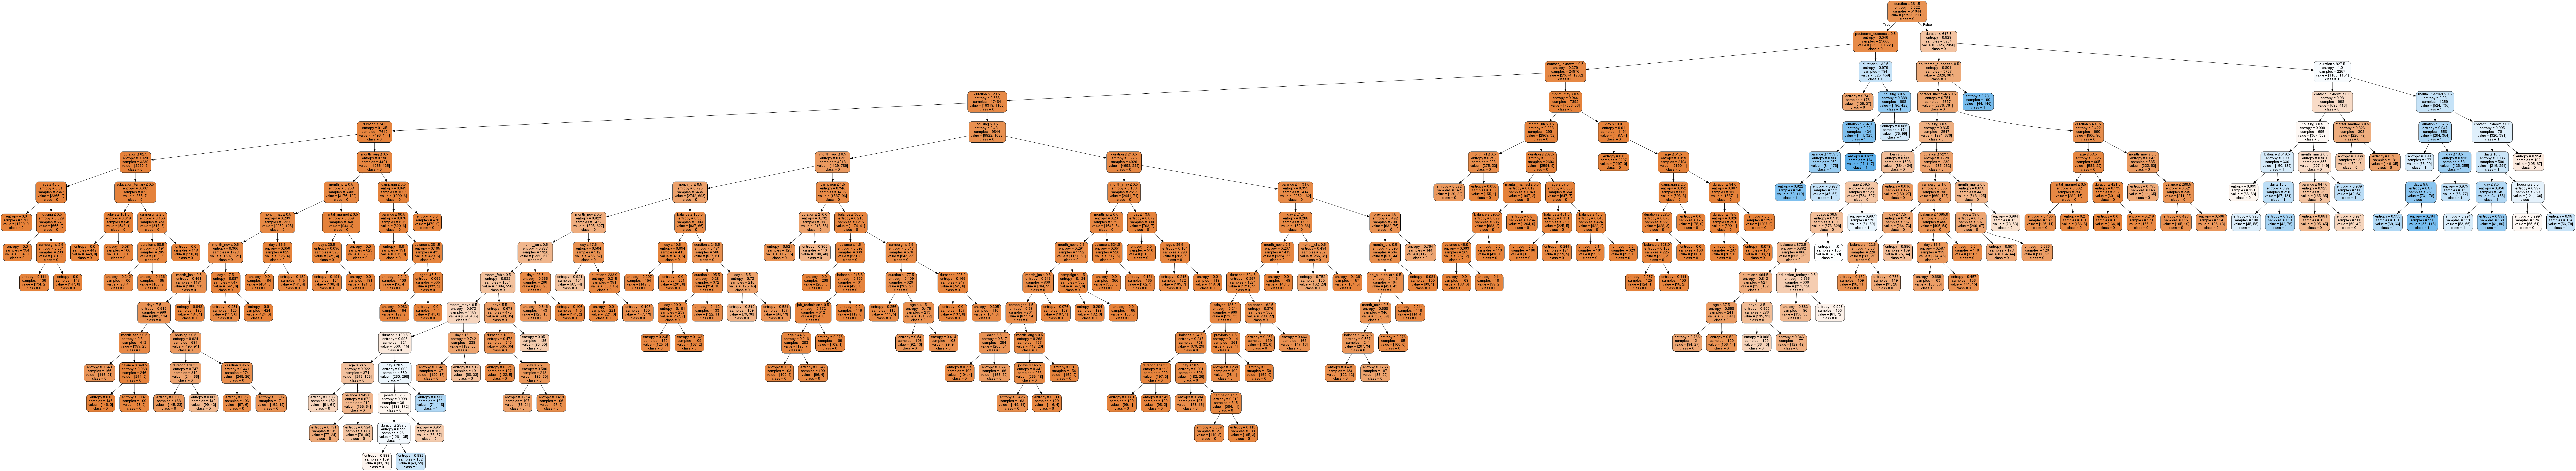

In [30]:
#Best Decision Tree 
# DT_16_100    , DT_25_100 , DT_7_50
# If you look at DT_7_50 its acceptable, but for this exercise I will take DT_16_100
best_dt_model = DecisionTreeClassifier(criterion = 'entropy' , max_depth=16, min_samples_leaf=100, random_state = 7 )
best_dt_model.fit(x_train, y_train) 
pred_test= best_dt_model.predict(x_test)

dot_data = StringIO()
export_graphviz(best_dt_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('best_dt_model.png')
Image(graph.create_png())

In [31]:
#Print the feature importance of the decision model
feat_importance = best_dt_model.tree_.compute_feature_importances(normalize=False)
feat_imp_dict = dict(zip(feature_cols, best_dt_model.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

## As expected, duration of last contact is always highly predictive of whether they accepted or not
## As people not interested will not entertain a long call
## Previous customers are always important

0
duration             0.460833
poutcome_success     0.188387
contact_unknown      0.082900
housing              0.046314
month_jul            0.035429
day                  0.034865
month_aug            0.021824
month_may            0.021257
balance              0.020304
month_nov            0.017612
campaign             0.014876
month_jan            0.014733
month_feb            0.010946
month_jun            0.007098
age                  0.006217
pdays                0.003894
marital_married      0.003693
loan                 0.003124
previous             0.002922
education_tertiary   0.001765
job_blue-collar      0.000792
job_technician       0.000217
job_student          0.000000
job_retired          0.000000
month_oct            0.000000
month_mar            0.000000
job_entrepreneur     0.000000
job_housemaid        0.000000
job_management       0.000000
month_dec            0.000000
job_self-employed    0.000000
poutcome_unknown     0.000000
poutcome_other       0.000000
job_services         0.000000
contact_telephone    0.000000
education_unknown    0.000000
education_secondary  0.000000
marital_single       0.000000
default              0.000000
job_unknown          0.000000
job_unemployed       0.000000
month_sep            0.000000

In [32]:
## We can remove unnecessary features 
## But I am skipping this for this exercise

In [33]:
#confusion matrix
pd.crosstab(y_test, pred_test, rownames=['Actual'], colnames=['Predicted'] , margins = True, normalize = True)


Predicted         0         1       All
Actual                                 
0          0.852540  0.031704  0.884244
1          0.064366  0.051390  0.115756
All        0.916906  0.083094  1.000000

## Logistic Regression Analysis

In [34]:
#fine tune params and build a display data frame
#using different penalty , solver and C
solver = ['newton-cg','liblinear']
C = [0.1,0.25,0.5,0.75,1]
penalty = ['l1', 'l2']


for s in solver:
    for p in penalty:
        proceed = True
        if p == 'l1':
            proceed = s in ['saga', 'liblinear']
        
        if proceed:
            for c in C:
                model = LogisticRegression(C=c,random_state=7,penalty=p,solver=s)
                model.fit(x_train, y_train)
                df_performace = pd.concat( [df_performace , build_performance_df(model, 'LR_'+s+'_'+p+'_'+str(c), x_test , y_test , x_train , y_train  )])



E:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
E:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
E:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
E:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


In [35]:

df_performace.sort_values(by=['score_test'], inplace=True, ascending=False)
df_performace.head(10)

score_test  score_train    Recall  Precision  F1 Score  \
DT_16_100               0.903930     0.904879  0.443949   0.618456  0.516871   
DT_25_100               0.903930     0.904879  0.443949   0.618456  0.516871   
LR_liblinear_l1_1       0.903709     0.901688  0.348408   0.659036  0.455833   
LR_liblinear_l1_0.75    0.903709     0.901656  0.347771   0.659420  0.455379   
LR_liblinear_l1_0.5     0.903709     0.901435  0.347134   0.659806  0.454925   
LR_newton-cg_l2_0.75    0.903635     0.901688  0.346497   0.659394  0.454280   
LR_newton-cg_l2_1       0.903561     0.901593  0.347134   0.658213  0.454545   
LR_newton-cg_l2_0.5     0.903487     0.901466  0.345860   0.658182  0.453445   
DT_7_50                 0.903414     0.904342  0.389172   0.635135  0.482622   
LR_liblinear_l1_0.25    0.903266     0.901530  0.343949   0.656934  0.451505   

                      Roc Auc Score  
DT_16_100                  0.704047  
DT_25_100                  0.704047  
LR_liblinear_l1_1          0.662405  
LR_liblinear_l1_0.75       0.662128  
LR_liblinear_l1_0.5        0.661852  
LR_newton-cg_l2_0.75       0.661533  
LR_newton-cg_l2_1          0.661768  
LR_newton-cg_l2_0.5        0.661173  
DT_7_50                    0.679952  
LR_liblinear_l1_0.25       0.660218

In [36]:
## Best Logistic Regression 
## LR_liblinear_l1_0.75
best_lr_model =  LogisticRegression(C=0.75,random_state=42,penalty='l1',solver='liblinear')
best_lr_model.fit(x_train, y_train) 
pred_test= best_lr_model.predict(x_test)


In [37]:
#Print the feature importance of the decision model
feat_imp_dict = dict(zip(feature_cols, best_lr_model.coef_[0]))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

#poutcome_sucess is high - which signifies that existing cutomers who previously said yes are good condidates

0
poutcome_success     2.140688
month_mar            1.520592
month_oct            0.917023
month_sep            0.771932
month_dec            0.763244
month_jun            0.506066
job_student          0.417020
education_tertiary   0.364203
job_retired          0.360604
education_unknown    0.263282
education_secondary  0.226128
poutcome_other       0.106220
marital_single       0.069934
previous             0.020617
day                  0.009636
duration             0.004187
balance              0.000014
pdays               -0.000239
age                 -0.003893
default             -0.060961
job_management      -0.066064
campaign            -0.096898
contact_telephone   -0.106563
job_technician      -0.116776
job_unemployed      -0.144750
marital_married     -0.153966
poutcome_unknown    -0.180364
job_services        -0.184176
month_feb           -0.185366
job_self-employed   -0.195436
job_blue-collar     -0.269966
job_unknown         -0.274709
month_may           -0.347252
job_entrepreneur    -0.401260
loan                -0.460056
job_housemaid       -0.470450
month_aug           -0.712724
housing             -0.714740
month_nov           -0.812392
month_jul           -0.821533
month_jan           -1.360710
contact_unknown     -1.632894

In [38]:
#confusion matrix
pd.crosstab(y_test, pred_test, rownames=['Actual'], colnames=['Predicted'] , margins = True, normalize = True)

Predicted         0         1       All
Actual                                 
0          0.863452  0.020792  0.884244
1          0.075500  0.040257  0.115756
All        0.938952  0.061048  1.000000

## Deliverable – 3 (create the ensemble model) – (30)

2. Build the ensemble models (Bagging and Boosting) and note the model performance by using different matrices. Use same metrics as in above model. (at least 3 algorithms) (15 marks)

   ## Ensemble Techniques Bagging

In [39]:
from sklearn.ensemble import BaggingClassifier

# Bagging with pruned best dt
ests = [ 50, 100,200] # estimators
for e in ests:
    model = BaggingClassifier(base_estimator=best_dt_model, max_samples =0.7, n_estimators=e,random_state=7 )
    model = model.fit(x_train, y_train)
    df_performace = pd.concat( [df_performace , build_performance_df(model, 'BAG_DTBEST_'+'_'+str(e), x_test , y_test , x_train , y_train  )])

# Bagging with None dt
for e in ests:
    model = BaggingClassifier(base_estimator=None,max_samples =0.7, n_estimators=e,random_state=7 )
    model = model.fit(x_train, y_train)
    df_performace = pd.concat( [df_performace , build_performance_df(model, 'BAG_None_'+'_'+str(e), x_test , y_test , x_train , y_train  )])


In [40]:
df_performace.sort_values(by=['score_test'], inplace=False, ascending=False).head(20)


score_test  score_train    Recall  Precision  F1 Score  \
BAG_None__200           0.907395     0.996871  0.469427   0.635345  0.539927   
BAG_None__100           0.906142     0.996018  0.455414   0.631068  0.529042   
BAG_None__50            0.904741     0.993237  0.447771   0.623227  0.521127   
BAG_DTBEST__100         0.904372     0.903078  0.392994   0.642040  0.487554   
DT_25_100               0.903930     0.904879  0.443949   0.618456  0.516871   
DT_16_100               0.903930     0.904879  0.443949   0.618456  0.516871   
LR_liblinear_l1_1       0.903709     0.901688  0.348408   0.659036  0.455833   
LR_liblinear_l1_0.75    0.903709     0.901656  0.347771   0.659420  0.455379   
LR_liblinear_l1_0.5     0.903709     0.901435  0.347134   0.659806  0.454925   
LR_newton-cg_l2_0.75    0.903635     0.901688  0.346497   0.659394  0.454280   
LR_newton-cg_l2_1       0.903561     0.901593  0.347134   0.658213  0.454545   
LR_newton-cg_l2_0.5     0.903487     0.901466  0.345860   0.658182  0.453445   
DT_7_50                 0.903414     0.904342  0.389172   0.635135  0.482622   
BAG_DTBEST__50          0.903340     0.903204  0.395541   0.631740  0.486486   
LR_liblinear_l1_0.25    0.903266     0.901530  0.343949   0.656934  0.451505   
LR_newton-cg_l2_0.25    0.903266     0.901435  0.343312   0.657317  0.451046   
BAG_DTBEST__200         0.903193     0.903015  0.391083   0.632338  0.483274   
LR_newton-cg_l2_0.1     0.902971     0.901150  0.336943   0.657960  0.445661   
DT_10_100               0.902898     0.902888  0.404459   0.624385  0.490916   
LR_liblinear_l2_0.25    0.902824     0.901182  0.340127   0.654412  0.447611   

                      Roc Auc Score  
BAG_None__200              0.717078  
BAG_None__100              0.710280  
BAG_None__50               0.706167  
BAG_DTBEST__100            0.682155  
DT_25_100                  0.704047  
DT_16_100                  0.704047  
LR_liblinear_l1_1          0.662405  
LR_liblinear_l1_0.75       0.662128  
LR_liblinear_l1_0.5        0.661852  
LR_newton-cg_l2_0.75       0.661533  
LR_newton-cg_l2_1          0.661768  
LR_newton-cg_l2_0.5        0.661173  
DT_7_50                    0.679952  
BAG_DTBEST__50             0.682679  
LR_liblinear_l1_0.25       0.660218  
LR_newton-cg_l2_0.25       0.659941  
BAG_DTBEST__200            0.680658  
LR_newton-cg_l2_0.1        0.657006  
DT_10_100                  0.686303  
LR_liblinear_l2_0.25       0.658307

In [41]:
##Best Bagging without overfit [ I have used max samples of 0.7]
##BAG_DTBEST__100
best_bag_model = BaggingClassifier(base_estimator=best_dt_model, max_samples =0.7, n_estimators=100,random_state=7 )
best_bag_model = best_bag_model.fit(x_train, y_train)

In [42]:
#confusion matrix
pred_test= best_bag_model.predict(x_test)
pd.crosstab(y_test, pred_test, rownames=['Actual'], colnames=['Predicted'] , margins = True, normalize = True)

Predicted         0         1       All
Actual                                 
0          0.858881  0.025363  0.884244
1          0.070265  0.045491  0.115756
All        0.929145  0.070855  1.000000

# Ensemble Learning - AdaBoosting

In [43]:
from sklearn.ensemble import AdaBoostClassifier


In [44]:
# Bagging with pruned best dt
ests = [ 50, 100,200] # estimators
for e in ests:
    model = AdaBoostClassifier(n_estimators=e, random_state=7)
    model = model.fit(x_train, y_train)
    df_performace = pd.concat( [df_performace , build_performance_df(model, 'ADA_None'+'_'+str(e), x_test , y_test , x_train , y_train  )])

for e in ests:
    model = AdaBoostClassifier(base_estimator = best_dt_model ,n_estimators=e, random_state=7)
    model = model.fit(x_train, y_train)
    df_performace = pd.concat( [df_performace , build_performance_df(model, 'ADA_DT'+'_'+str(e), x_test , y_test , x_train , y_train  )])


In [45]:
df_performace.sort_values(by=['score_test'], inplace=False, ascending=False).head(30)

score_test  score_train    Recall  Precision  F1 Score  \
BAG_None__200           0.907395     0.996871  0.469427   0.635345  0.539927   
BAG_None__100           0.906142     0.996018  0.455414   0.631068  0.529042   
BAG_None__50            0.904741     0.993237  0.447771   0.623227  0.521127   
BAG_DTBEST__100         0.904372     0.903078  0.392994   0.642040  0.487554   
DT_25_100               0.903930     0.904879  0.443949   0.618456  0.516871   
DT_16_100               0.903930     0.904879  0.443949   0.618456  0.516871   
LR_liblinear_l1_0.5     0.903709     0.901435  0.347134   0.659806  0.454925   
LR_liblinear_l1_1       0.903709     0.901688  0.348408   0.659036  0.455833   
LR_liblinear_l1_0.75    0.903709     0.901656  0.347771   0.659420  0.455379   
LR_newton-cg_l2_0.75    0.903635     0.901688  0.346497   0.659394  0.454280   
LR_newton-cg_l2_1       0.903561     0.901593  0.347134   0.658213  0.454545   
LR_newton-cg_l2_0.5     0.903487     0.901466  0.345860   0.658182  0.453445   
DT_7_50                 0.903414     0.904342  0.389172   0.635135  0.482622   
BAG_DTBEST__50          0.903340     0.903204  0.395541   0.631740  0.486486   
LR_liblinear_l1_0.25    0.903266     0.901530  0.343949   0.656934  0.451505   
LR_newton-cg_l2_0.25    0.903266     0.901435  0.343312   0.657317  0.451046   
BAG_DTBEST__200         0.903193     0.903015  0.391083   0.632338  0.483274   
LR_newton-cg_l2_0.1     0.902971     0.901150  0.336943   0.657960  0.445661   
ADA_None_200            0.902971     0.903520  0.385350   0.632845  0.479018   
DT_10_100               0.902898     0.902888  0.404459   0.624385  0.490916   
LR_liblinear_l2_0.25    0.902824     0.901182  0.340127   0.654412  0.447611   
ADA_None_100            0.902750     0.902857  0.380892   0.632804  0.475547   
DT_25_50                0.902750     0.908956  0.454777   0.606627  0.519840   
LR_liblinear_l2_0.5     0.902750     0.901182  0.340764   0.653236  0.447886   
DT_16_50                0.902750     0.908671  0.468790   0.602785  0.527410   
DT_7_100                0.902676     0.902857  0.383439   0.631027  0.477021   
LR_liblinear_l1_0.1     0.902529     0.901403  0.336306   0.653465  0.444071   
DT_10_50                0.901644     0.905511  0.384713   0.621399  0.475216   
LR_liblinear_l2_1       0.901423     0.900771  0.317197   0.652687  0.426918   
LR_liblinear_l2_0.75    0.901349     0.900613  0.315287   0.653034  0.425258   

                      Roc Auc Score  
BAG_None__200              0.717078  
BAG_None__100              0.710280  
BAG_None__50               0.706167  
BAG_DTBEST__100            0.682155  
DT_25_100                  0.704047  
DT_16_100                  0.704047  
LR_liblinear_l1_0.5        0.661852  
LR_liblinear_l1_1          0.662405  
LR_liblinear_l1_0.75       0.662128  
LR_newton-cg_l2_0.75       0.661533  
LR_newton-cg_l2_1          0.661768  
LR_newton-cg_l2_0.5        0.661173  
DT_7_50                    0.679952  
BAG_DTBEST__50             0.682679  
LR_liblinear_l1_0.25       0.660218  
LR_newton-cg_l2_0.25       0.659941  
BAG_DTBEST__200            0.680658  
LR_newton-cg_l2_0.1        0.657006  
ADA_None_200               0.678042  
DT_10_100                  0.686303  
LR_liblinear_l2_0.25       0.658307  
ADA_None_100               0.675979  
DT_25_50                   0.708086  
LR_liblinear_l2_0.5        0.658542  
DT_16_50                   0.714175  
DT_7_100                   0.677045  
LR_liblinear_l1_0.1        0.656479  
DT_10_50                   0.677014  
LR_liblinear_l2_1          0.647551  
LR_liblinear_l2_0.75       0.646679

In [46]:
# Adaboost did not perform as good as Bagging
##Best AdaBoot
##ADA_None_100
best_ada_model = AdaBoostClassifier(n_estimators=100, random_state=1)
best_ada_model = best_ada_model.fit(x_train, y_train)

In [47]:
#confusion matrix
pred_test= best_ada_model.predict(x_test)
pd.crosstab(y_test, pred_test, rownames=['Actual'], colnames=['Predicted'] , margins = True, normalize = True)

Predicted         0         1       All
Actual                                 
0          0.858660  0.025584  0.884244
1          0.071666  0.044091  0.115756
All        0.930325  0.069675  1.000000

##  Ensemble Learning - GradientBoost

In [48]:
from sklearn.ensemble import GradientBoostingClassifier


In [49]:
# GB 
ests = [ 50, 100,200] # estimators
depths = [ 3 ,5, 7]
for e in ests:
    for d in depths:
        model =GradientBoostingClassifier(n_estimators = e,random_state=7, max_depth = d)
        model = model.fit(x_train, y_train)
        df_performace = pd.concat( [df_performace , build_performance_df(model, 'GBC'+'_'+str(e) +'_'  +str(d), x_test , y_test , x_train , y_train  )])


In [50]:
df_performace.sort_values(by=['score_test'], inplace=False, ascending=False).head(30)

score_test  score_train    Recall  Precision  F1 Score  \
GBC_200_5               0.909238     0.941379  0.483439   0.643766  0.552201   
GBC_100_5               0.909017     0.929655  0.456688   0.653005  0.537481   
GBC_200_3               0.908575     0.917394  0.439490   0.657143  0.526718   
GBC_100_3               0.907911     0.910757  0.419108   0.661307  0.513060   
GBC_50_7                0.907469     0.943781  0.457325   0.640500  0.533631   
BAG_None__200           0.907395     0.996871  0.469427   0.635345  0.539927   
GBC_50_5                0.907321     0.919037  0.416561   0.657286  0.509942   
GBC_100_7               0.906658     0.956137  0.488535   0.623577  0.547857   
GBC_200_7               0.906437     0.972507  0.495541   0.619920  0.550796   
BAG_None__100           0.906142     0.996018  0.455414   0.631068  0.529042   
GBC_50_3                0.905331     0.906143  0.359873   0.669431  0.468103   
BAG_None__50            0.904741     0.993237  0.447771   0.623227  0.521127   
BAG_DTBEST__100         0.904372     0.903078  0.392994   0.642040  0.487554   
DT_25_100               0.903930     0.904879  0.443949   0.618456  0.516871   
DT_16_100               0.903930     0.904879  0.443949   0.618456  0.516871   
LR_liblinear_l1_0.5     0.903709     0.901435  0.347134   0.659806  0.454925   
LR_liblinear_l1_1       0.903709     0.901688  0.348408   0.659036  0.455833   
LR_liblinear_l1_0.75    0.903709     0.901656  0.347771   0.659420  0.455379   
LR_newton-cg_l2_0.75    0.903635     0.901688  0.346497   0.659394  0.454280   
LR_newton-cg_l2_1       0.903561     0.901593  0.347134   0.658213  0.454545   
LR_newton-cg_l2_0.5     0.903487     0.901466  0.345860   0.658182  0.453445   
DT_7_50                 0.903414     0.904342  0.389172   0.635135  0.482622   
BAG_DTBEST__50          0.903340     0.903204  0.395541   0.631740  0.486486   
LR_liblinear_l1_0.25    0.903266     0.901530  0.343949   0.656934  0.451505   
LR_newton-cg_l2_0.25    0.903266     0.901435  0.343312   0.657317  0.451046   
BAG_DTBEST__200         0.903193     0.903015  0.391083   0.632338  0.483274   
LR_newton-cg_l2_0.1     0.902971     0.901150  0.336943   0.657960  0.445661   
ADA_None_200            0.902971     0.903520  0.385350   0.632845  0.479018   
DT_10_100               0.902898     0.902888  0.404459   0.624385  0.490916   
LR_liblinear_l2_0.25    0.902824     0.901182  0.340127   0.654412  0.447611   

                      Roc Auc Score  
GBC_200_5                  0.724210  
GBC_100_5                  0.712460  
GBC_200_3                  0.704736  
GBC_100_3                  0.695504  
GBC_50_7                   0.711861  
BAG_None__200              0.717078  
GBC_50_5                   0.694064  
GBC_100_7                  0.724965  
GBC_200_7                  0.727884  
BAG_None__100              0.710280  
GBC_50_3                   0.668305  
BAG_None__50               0.706167  
BAG_DTBEST__100            0.682155  
DT_25_100                  0.704047  
DT_16_100                  0.704047  
LR_liblinear_l1_0.5        0.661852  
LR_liblinear_l1_1          0.662405  
LR_liblinear_l1_0.75       0.662128  
LR_newton-cg_l2_0.75       0.661533  
LR_newton-cg_l2_1          0.661768  
LR_newton-cg_l2_0.5        0.661173  
DT_7_50                    0.679952  
BAG_DTBEST__50             0.682679  
LR_liblinear_l1_0.25       0.660218  
LR_newton-cg_l2_0.25       0.659941  
BAG_DTBEST__200            0.680658  
LR_newton-cg_l2_0.1        0.657006  
ADA_None_200               0.678042  
DT_10_100                  0.686303  
LR_liblinear_l2_0.25       0.658307

In [51]:
# Gradient Boosting gives  the best model performance
best_gb_model =GradientBoostingClassifier(n_estimators = 200,random_state=7, max_depth = 5)
best_gb_model = best_gb_model.fit(x_train, y_train)

In [52]:
#confusion matrix
pred_test= best_gb_model.predict(x_test)
pd.crosstab(y_test, pred_test, rownames=['Actual'], colnames=['Predicted'] , margins = True, normalize = False)

Predicted      0     1    All
Actual                       
0          11573   420  11993
1            811   759   1570
All        12384  1179  13563

In [53]:
#conclusion - in the end The Gradient Boosting seems to give the best performance.